# Use Neural Network

### 2016/08/05 tjw at jobspace


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Neural Network?

## Supervised Learning

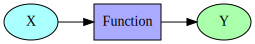

In [2]:
from  pydot import Node, Edge, Dot
from IPython.display import Image, SVG, HTML, IFrame
def make_graph(name, nodes, edges, **kwargs):
    graph= Dot('supervised', graph_type='digraph', rankdir='LR', bgcolor='transparent')
    for node in nodes:
        graph.add_node(node)
    for edge in edges:
        if isinstance(edge, tuple):
            edge = Edge(*edge)
        graph.add_edge(edge)
    graph.write_svg(name+'.svg')
    return SVG(graph.create_svg())

def C(n, s='box', c='white', label=None):
    if label is None:
        label=n
    return Node(n, label=label, shape=s, style='filled', fillcolor='"%s"'%c)

nodes = [C('X', 'oval', '#aaffff'), 
         C('f', 'box', '#aaaaff', label='Function'), 
         C('Y', 'oval', '#aaffaa'),]
edges = [('X', 'f'), ('f', 'Y')]
    

make_graph('supervised', nodes, edges, graph_type='digraph', rankdir='LR', bgcolor='transparent')


<img src='./supervised.svg' width='90%' />

    "I see you as a human being. I will educate you well."    --- Ma Ying-jeou

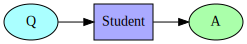

In [3]:

nodes = [C('Q', 'oval', '#aaffff'), 
         C('f', 'box', '#aaaaff', label='Student'), 
         C('A', 'oval', '#aaffaa'),]
edges = [('Q', 'f'), ('f', 'A')]
    

make_graph('supervised2', nodes, edges, graph_type='digraph', rankdir='LR', bgcolor='transparent')

<img src='./supervised2.svg' width='90%' />

* Training material
* Grading/score
* Training method
* Test 

## MNIST
<img src="Samples-from-the-MNIST-database.png" width="90%" />

## Font
<img src="font.jpg" width="85%" />

## Waifu2x
<img src="waifu2x.png" width="90%" />
CC-BY-NC "For Creators", http://piapro.net/en_for_creators.html

In [4]:
IFrame("https://tjwei.github.io/2048-NN", "90%", 800)

## Tools
* Theano/lasagne
* Keras
* Tensorflow/tflearn
* neon
* torch
* caffe


# End of the story?

## Issues (Type I)
* Q without A
* Not enough samples
* How to encode the problem?


## Researching direction
e.g.  https://openai.com/blog/generative-models/

# There are plenty of low hanging fruits

(unless you are doing research)

# Issues (Type II)

## My model is not learning

# Feedforward Neural Network

<img src="https://camo.githubusercontent.com/30a00ccdd6837573f5cb2571af6d42ce19d41097/687474703a2f2f692e696d6775722e636f6d2f486466656e74422e706e67" />

In [5]:
from lasagne.layers import *
from lasagne.nonlinearities import *
import lavis
def draw(l, output_shape=False, rankdir="TB"):
    return lavis.draw_to_notebook(get_all_layers(l), output_shape=output_shape, rankdir=rankdir)
def draw_to_file(name, l, output_shape=False, rankdir="TB"):
    dot = lavis.get_pydot_graph(get_all_layers(l), output_shape=output_shape, rankdir=rankdir)
    dot.write_svg(name+".svg")

In [6]:
l_in = InputLayer(shape=(None, 2))
l_hidden = DenseLayer(l_in, num_units=3)
l_out = DenseLayer(l_hidden, num_units=1, nonlinearity=sigmoid)

In [7]:
draw_to_file("simple_network", l_out, True, "LR")

<img src="simple_network.svg" width="90%" />

### $$ Wx+b $$

## Sigmoid
$$ \frac{1}{1 + e^{-x}} $$

In [8]:
x=linspace(-5,5, 1001)

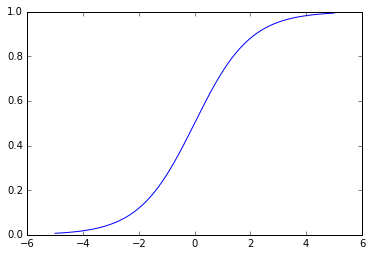

In [9]:
plot(x, 1 / (1 + exp(-x)));

## Relu (rectify)

$$  max ( 0 , x )  $$


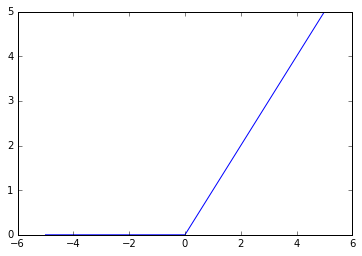

In [10]:
plot(x, maximum(0, x));

## tanh
$$ \frac{e^{2x}-1}{e^{2x}+1} $$


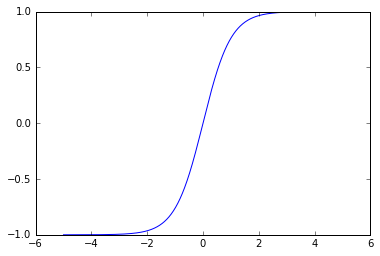

In [11]:
plot(x, (exp(2*x)-1)/(exp(2*x)+1));

## CNN 
* convolution (correlation)
* kernel
* pool
* dropout

## Application: using hidden layers

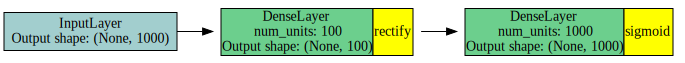

In [12]:
l_in = InputLayer(shape=(None, 1000))
l_hidden = DenseLayer(l_in, num_units=100)
l_out = DenseLayer(l_hidden, num_units=1000, nonlinearity=sigmoid)
draw_to_file("autoencoder", l_out, True, "LR")
draw(l_out, True, "LR")

<img src="autoencoder.svg" width="90%" />

## Neural Matching
https://github.com/tjwei/Neural-Matching/blob/master/matching-theano-VGG-one-patch.ipynb

# Educate your NN

# Empathy: You were a student too


# Overfitting

## Data

In [13]:
x = linspace(-5, 5, 20)
x0 = linspace(-5, 5, 100)
error = 10*random.rand(x.shape[0])-5

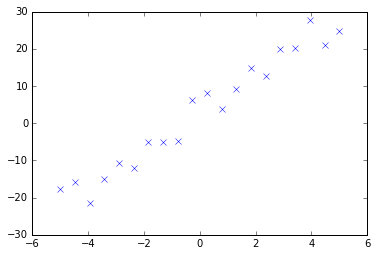

In [14]:
y = 5*x+3+error
plot(x, y, 'x');

## linear fit

In [15]:
w=polyfit(x,y,1)
p1=poly1d(w)

14.093747221755869

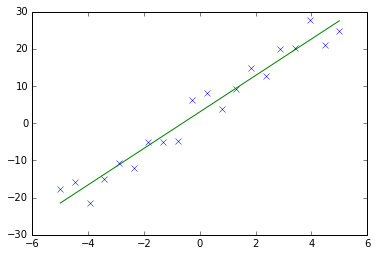

In [65]:
plot(x, y, 'x');
plot(x0, p1(x0));
norm(y-p1(x))

## Quadratic fit

In [67]:
w=polyfit(x,y,2)
p2=poly1d(w)

14.093419716491397

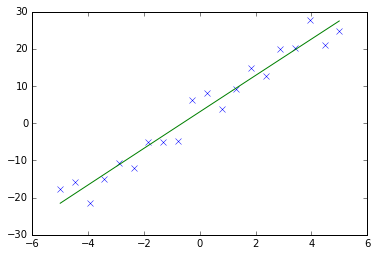

In [68]:
plot(x, y, 'x');
plot(x0, p2(x0));
norm(y-p2(x))

## d=5 fit

In [19]:
w=polyfit(x,y,5)
p5=poly1d(w)

11.886098390621243

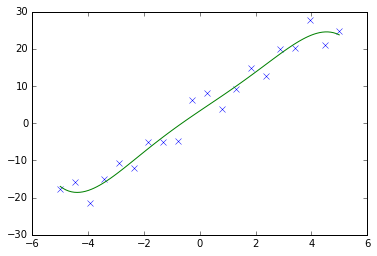

In [63]:
plot(x, y, 'x');
plot(x0, p5(x0));
norm(y-p5(x))

## d=20 fit

In [21]:
w=polyfit(x,y,20, rcond=1e-30)
p20=poly1d(w)

/usr/lib64/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


9.5188953035760114e-09

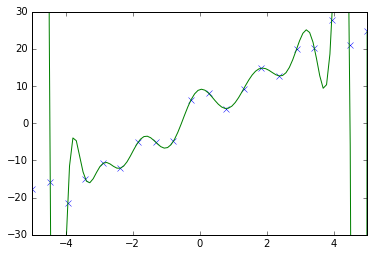

In [61]:
plot(x, y, 'x');
plot(x0, p20(x0));
plt.axis([-5, 5, -30, 30])
norm(y-p20(x))

## Test

(386.63726305189118, 15.339063237076434)

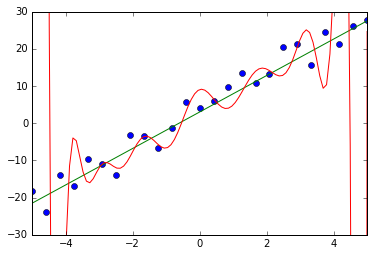

In [60]:
x2 =linspace(-5,5,25)
error2 = random.rand(x2.shape[0])*10-5
y2 = 5*x2+3+error2
plot(x2,y2, 'o')
plot(x0, p1(x0))
plot(x0, p20(x0));
plt.axis([-5, 5, -30, 30]);
norm(y2-p20(x2)), norm(y2-p1(x2))

# The 10,000 Hour Rule

# Making Mistakes is essential

# Learning is all about generalization

# You cannot learn from textbook

# Reinforcement Learning: expectation vs. exploration

In [136]:
def learner(ϵ=0, n=10):
    p = rand(n)*10   
    t = ones(n)
    while 1:
        #print("learner", p)
        if rand() < ϵ:
            a = randint(n)
        else:
            a = argmax(p)
        reward = yield a
        t[a]+=1
        p[a] = p[a]+(reward-p[a])/t[a]

def bandit(n=10):
    p = rand(n)*10
    #print("bandit", p)
    a = -1
    while 1:
        if a == -1:
            a = yield p
        else:            
            a = yield random.normal(p[a])

In [149]:
N=5000
M=2000
result1=zeros(N)
result2=zeros(N)
result3=zeros(N)
for j in range(M):    
    b = bandit()
    p = next(b)
    
    l = learner(.1)
    a = next(l)
    total = 0
    for i in range(N):
        reward = b.send(a)
        total += reward
        a= l.send(reward)
        result1[i]+=total/(i+1)/p.max()
        
    l = learner(.01)
    a = next(l)
    total = 0
    for i in range(N):
        reward = b.send(a)
        total += reward
        a= l.send(reward)
        result2[i]+=total/(i+1)/p.max()
        
    l = learner(0)
    a = next(l)
    total = 0
    for i in range(N):
        reward = b.send(a)
        total += reward
        a= l.send(reward)
        result3[i]+=total/(i+1)/p.max()

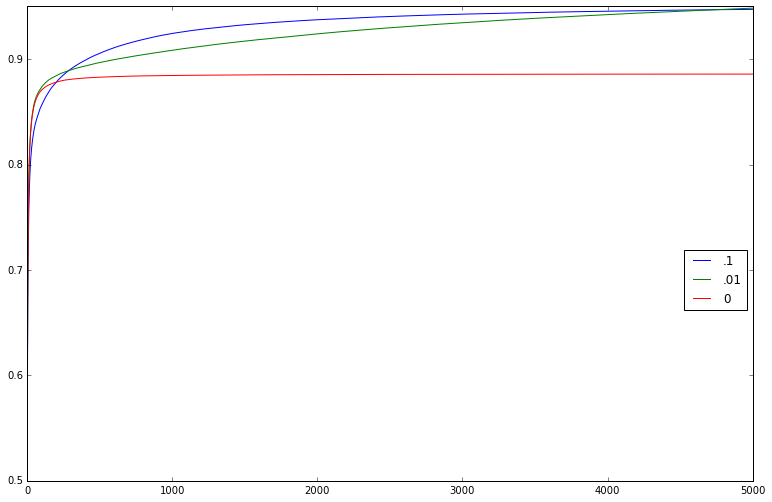

In [151]:
plt.figure(figsize=(13,8.5));
plot(result1/M, label=".1");plot(result2/M, label=".01");plot(result3/M, label="0");
plt.legend(bbox_to_anchor=(1, 0.5));
savefig("rl2.png")

<img src="rl.png"  width="85%" />

<img src="rl.png"  width="85%" />